Importing Required Libraries

In [94]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [116]:
file_path= "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-Coursera/laptop_pricing_dataset_mod1.csv"
df = pd.read_csv(file_path,header=0)

**`header` Parameter**: 
   - The `header` parameter in `pd.read_csv()` determines which row in the CSV file will be used to assign column names to the DataFrame.
   - By default, `header=0`, meaning the first row (index 0 in Python, as indexing starts from 0) of the CSV file is treated as the column names.

In [4]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 238 entries, 0 to 237
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      238 non-null    int64  
 1   Manufacturer    238 non-null    object 
 2   Category        238 non-null    int64  
 3   Screen          238 non-null    object 
 4   GPU             238 non-null    int64  
 5   OS              238 non-null    int64  
 6   CPU_core        238 non-null    int64  
 7   Screen_Size_cm  234 non-null    float64
 8   CPU_frequency   238 non-null    float64
 9   RAM_GB          238 non-null    int64  
 10  Storage_GB_SSD  238 non-null    int64  
 11  Weight_kg       233 non-null    float64
 12  Price           238 non-null    int64  
dtypes: float64(3), int64(8), object(2)
memory usage: 24.3+ KB
None


In [6]:
df.head()

,Unnamed: 0,Manufacturer,Category,Screen,GPU,OS,CPU_core,Screen_Size_cm,CPU_frequency,RAM_GB,Storage_GB_SSD,Weight_kg,Price
0,0,Acer,4,IPS Panel,2,1,5,35.560,1.6,8,256,1.60,978
1,1,Dell,3,Full HD,1,1,3,39.624,2.0,4,256,2.20,634
2,2,Dell,3,Full HD,1,1,7,39.624,2.7,8,256,2.20,946
3,3,Dell,4,IPS Panel,2,1,5,33.782,1.6,8,128,1.22,1244
4,4,HP,4,Full HD,2,1,7,39.624,1.8,8,256,1.91,837


In [96]:
df[['Screen_Size_cm']] = np.round(df[['Screen_Size_cm']],2)
df.head()

KeyError: "None of [Index(['Screen_Size_cm'], dtype='object')] are in the [columns]"

### **Key Differences**

| Aspect                      | `df["Screen_Size_cm"]`            | `df[['Screen_Size_cm']]`       |
|-----------------------------|------------------------------------|---------------------------------|
| **Type**                    | `pandas.Series`                   | `pandas.DataFrame`             |
| **Shape**                   | 1D (single column, no table view) | 2D (column + index structure)  |
| **Indexing Compatibility**  | Can use Series methods.           | Can apply DataFrame methods.   |
| **When to Use**             | Access a single column's data.    | Work with a DataFrame structure (even if single column). |

Evaluate the dataset for missing data

In [32]:
missing_data = df.isnull()
# print(missing_data.head())
for column in missing_data.columns.values.tolist():
    print(column)
    print (missing_data[column].value_counts())
    print("") 


Unnamed: 0
Unnamed: 0
False    238
Name: count, dtype: int64

Manufacturer
Manufacturer
False    238
Name: count, dtype: int64

Category
Category
False    238
Name: count, dtype: int64

Screen
Screen
False    238
Name: count, dtype: int64

GPU
GPU
False    238
Name: count, dtype: int64

OS
OS
False    238
Name: count, dtype: int64

CPU_core
CPU_core
False    238
Name: count, dtype: int64

Screen_Size_cm
Screen_Size_cm
False    234
True       4
Name: count, dtype: int64

CPU_frequency
CPU_frequency
False    238
Name: count, dtype: int64

RAM_GB
RAM_GB
False    238
Name: count, dtype: int64

Storage_GB_SSD
Storage_GB_SSD
False    238
Name: count, dtype: int64

Weight_kg
Weight_kg
False    233
True       5
Name: count, dtype: int64

Price
Price
False    238
Name: count, dtype: int64



The method `value_counts()` is used in **pandas** to count the occurrence of unique values in a Series (a single column of a DataFrame). However, calling it on a column like `missing_data[column].value_counts()` might require an adjustment if the column contains missing values (`NaN`), because `value_counts()` ignores `NaN` by default.

### **What `value_counts()` Does**
1. **Counts Unique Values**:
   - It returns a Series with the unique values as the index and their counts as the values.

2. **Usage**:
   ```python
   df[column].value_counts()
   ```
   - Counts the number of occurrences of each unique value in the column `column`.

3. **Example**:
   ```python
   import pandas as pd
   data = {
       'Column': ['A', 'B', 'A', 'C', 'B', None, 'A']
   }
   df = pd.DataFrame(data)
   print(df['Column'].value_counts())
   ```
   **Output**:
   ```
   A    3
   B    2
   C    1
   Name: Column, dtype: int64
   ```
   - The result shows:
     - `A` appears 3 times.
     - `B` appears 2 times.
     - `C` appears 1 time.
   - Missing values (`None` or `NaN`) are ignored by default.

---

### **Including Missing Values in the Count**
To include missing values (`NaN`) in the count, you can use the `dropna=False` parameter:
```python
df['Column'].value_counts(dropna=False)
```

**Output**:
```
A      3
B      2
C      1
NaN    1
Name: Column, dtype: int64
```
- Now, missing values (`NaN`) are included in the count.


Replace with mean

In [53]:
print(df["Weight_kg"].isnull().value_counts())

mean = df["Weight_kg"].mean()

df["Weight_kg"] =df["Weight_kg"].replace(np.nan,mean)

# To check missing values count
print(df["Weight_kg"].isnull().value_counts())

Weight_kg
False    238
Name: count, dtype: int64
Weight_kg
False    238
Name: count, dtype: int64


Replace with the most frequent value

In [ ]:
common_screen_size = df['Screen_Size_cm'].value_counts().idxmax()

df["Screen_Size_cm"] = df["Screen_Size_cm"].replace(np.nan, common_screen_size)


### **What `idxmax()` Does in This Context**
- `value_counts()` produces a frequency distribution of screen sizes.
- `idxmax()` pinpoints the screen size with the **highest frequency**.
- The result, `common_screen_size`, is the **most frequently occurring screen size** in the dataset.

Fixing the data types

Both "Weight_kg" and "Screen_Size_cm" are seen to have the data type "Object", while both of them should be having a data type of "float". Write a code to fix the data type of these two columns.

In [ ]:
# df["Weight_kg"] = df["Weight_kg"].astype('float')
# df["Screen_Size_cm"] = df["Screen_Size_cm"].astype('float')

df[["Weight_kg","Screen_Size_cm"]] = df[["Weight_kg","Screen_Size_cm"]].astype("float")

Data Standardization

In [98]:
df["Screen_Size_cm"] = df["Screen_Size_cm"]/2.54
df.rename(columns={"Screen_Size_cm":"Screen_Size_in"},inplace=True)
df["Weight_kg"] = df["Weight_kg"]*2.205
df.rename(columns={"Weight_kg":"Weight_ponds"},inplace=True)

Data Normalization

In [ ]:
df["CPU_frequency"] = df["CPU_frequency"]/df["CPU_frequency"].max()


In [ ]:
df["CPU_frequency"]

Binning

In [102]:
bins = np.linspace(min(df["Price"]),max(df["Price"]),4)
group_names = ["Low", "Mediam", "High"]
df["Price-binned"] = pd.cut(df["Price"], bins, labels=group_names, include_lowest=True)

   **Parameters**:
   - `x`: The input array or Series (e.g., `df["Price"]`).
   - `bins`: The list or array of numeric values defining the bin edges.
   - `labels`: A list of labels for the resulting bins. Each label corresponds to a bin.
   - `include_lowest`: If `True`, the first interval includes its lower bound (closed on the left).

In [103]:
print(bins)
df[["Price","Price-binned"]]
# df[df["Price"]>2715]

[ 527.         1621.33333333 2715.66666667 3810.        ]


,Price,Price-binned
0,978,Low
1,634,Low
2,946,Low
3,1244,Low
4,837,Low
...,...,...
233,1891,Mediam
234,1950,Mediam
235,2236,Mediam
236,883,Low


Text(0.5, 1.0, 'Price bins')

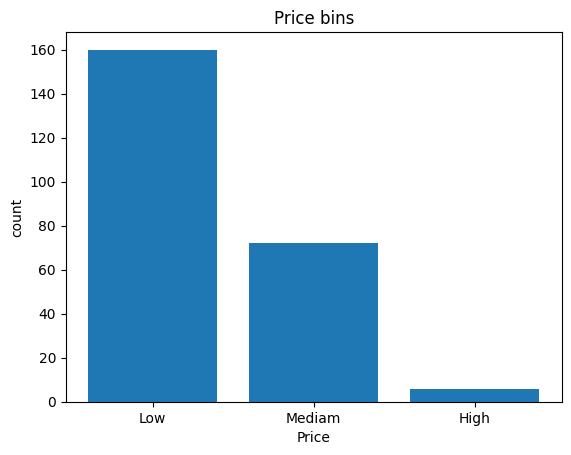

In [107]:

plt.bar(group_names, df["Price-binned"].value_counts())
plt.xlabel("Price")
plt.ylabel("count")
plt.title("Price bins")

Indicator variables

In [118]:
# Generate dummy variables for the "Screen" column
screen_dummies = pd.get_dummies(df["Screen"])

# Rename columns for clarity
screen_dummies.rename(columns={'IPS Panel': 'Screen-IPS_panel', 
                               'Full HD': 'Screen-Full_HD'}, inplace=True)

# Add dummy variables to the DataFrame and drop the original column
df = pd.concat([df, screen_dummies], axis=1).drop("Screen", axis=1)


In [119]:
df.head()

,Unnamed: 0,Manufacturer,Category,GPU,OS,CPU_core,Screen_Size_cm,CPU_frequency,RAM_GB,Storage_GB_SSD,Weight_kg,Price,Screen-Full_HD,Screen-IPS_panel
0,0,Acer,4,2,1,5,35.560,1.6,8,256,1.60,978,False,True
1,1,Dell,3,1,1,3,39.624,2.0,4,256,2.20,634,True,False
2,2,Dell,3,1,1,7,39.624,2.7,8,256,2.20,946,True,False
3,3,Dell,4,2,1,5,33.782,1.6,8,128,1.22,1244,False,True
4,4,HP,4,2,1,7,39.624,1.8,8,256,1.91,837,True,False
